Giải pháp ban đầu với epsilon = 1.0:


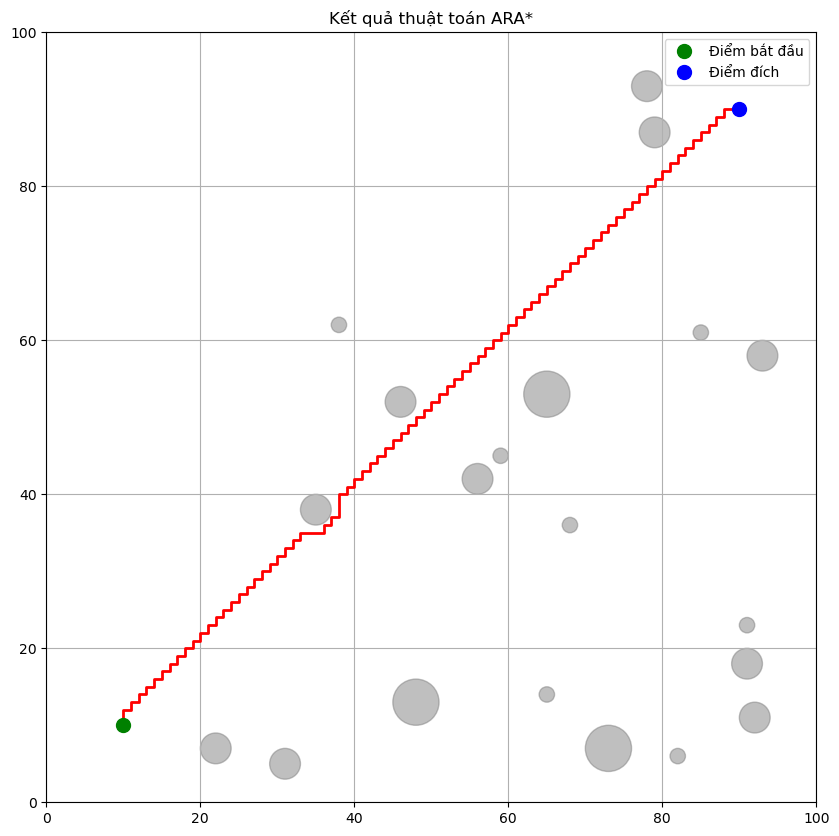

Tổng thời gian: 1.2339842319488525 giây
Thời gian thực thi: 1.2339842319488525 giây


In [1]:
import heapq
import time
import math
import random
import matplotlib.pyplot as plt
import numpy as np

def heuristic(start, goal):
    # Hàm heuristic (sử dụng khoảng cách Euclidean làm ví dụ)
    return math.sqrt((start[0] - goal[0])**2 + (start[1] - goal[1])**2)

def get_successors(state, grid):
    # Hàm lấy các trạng thái kế tiếp hợp lệ (các ô lân cận không phải là vật cản)
    successors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for d in directions:
        next_state = (state[0] + d[0], state[1] + d[1])
        if 0 <= next_state[0] < len(grid) and 0 <= next_state[1] < len(grid[0]) and grid[next_state[0]][next_state[1]] != 1:
            successors.append(next_state)
    return successors

def ARA_star(grid, start, goal, epsilon):
    # Khởi tạo
    g = {start: 0}
    f = {start: epsilon * heuristic(start, goal)}
    open_list = []
    heapq.heappush(open_list, (f[start], start))
    closed_list = set()
    incons = set()
    start_time = time.time()

    def return_g(state):
        # Hàm trả về giá trị g(state) + ε * heuristic(state, goal)
        return g.get(state, float('inf')) + epsilon * heuristic(state, goal)

    def improve_path():
        # Hàm cải thiện đường đi
        while open_list and f.get(goal, float('inf')) > open_list[0][0]:
            _, current = heapq.heappop(open_list)
            closed_list.add(current)
            for succ in get_successors(current, grid):
                if succ not in g:
                    g[succ] = float('inf')
                if g[succ] > g[current] + 1:  # Giả sử chi phí giữa các trạng thái là 1
                    g[succ] = g[current] + 1
                    f[succ] = g[succ] + epsilon * heuristic(succ, goal)
                    if succ not in closed_list:
                        heapq.heappush(open_list, (f[succ], succ))
                    else:
                        incons.add(succ)

    # Vòng lặp chính
    g[goal] = float('inf')
    improve_path()
    epsilon_prime = min(epsilon, g[goal] / min([return_g(s) for _, s in open_list + list(incons)]))
    print(f"Giải pháp ban đầu với epsilon = {epsilon_prime}:")
    path = reconstruct_path(g, start, goal)
    plot_result(obstacles, path, start, goal)

    while epsilon_prime > 1:
        epsilon -= 0.1
        while incons:
            s = incons.pop()
            heapq.heappush(open_list, (f[s], s))
        for i in range(len(open_list)):
            state = open_list[i][1]
            f[state] = g[state] + epsilon * heuristic(state, goal)
            open_list[i] = (f[state], state)
        heapq.heapify(open_list)
        closed_list.clear()
        improve_path()
        epsilon_prime = min(epsilon, g[goal] / min([return_g(s) for _, s in open_list + list(incons)]))
        print(f"Giải pháp với epsilon = {epsilon_prime}:")
        path = reconstruct_path(g, start, goal)
        plot_result(obstacles, path, start, goal)

    end_time = time.time()
    print(f"Tổng thời gian: {end_time - start_time} giây")

def reconstruct_path(g, start, goal):
    # Hàm tái tạo đường đi tìm được
    if g[goal] == float('inf'):
        print("Không tìm thấy đường đi.")
        return []
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = min(get_successors(current, grid), key=lambda s: g.get(s, float('inf')))
    path.append(start)
    path.reverse()
    return path

def create_obstacle(x, y, size):
    # Hàm tạo vật cản với kích thước ngẫu nhiên
    return {"x": x, "y": y, "radius": size}

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')

    for obstacle in obstacles:
        circle = plt.Circle((obstacle["x"], obstacle["y"]), obstacle["radius"],
                            fill=True, color='gray', alpha=0.5)
        ax.add_artist(circle)

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán ARA*')
    plt.grid(True)

    # Lưu ảnh
    plt.savefig('pic5.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def main():
    global grid, obstacles
    grid = [[0 for _ in range(100)] for _ in range(100)]
    obstacles = [create_obstacle(random.randint(5, 95), random.randint(5, 95), random.choice([1, 2, 3])) for _ in range(20)]
    for obstacle in obstacles:
        for i in range(-obstacle["radius"], obstacle["radius"] + 1):
            for j in range(-obstacle["radius"], obstacle["radius"] + 1):
                if 0 <= obstacle["x"] + i < 100 and 0 <= obstacle["y"] + j < 100:
                    if math.sqrt(i**2 + j**2) <= obstacle["radius"]:
                        grid[obstacle["x"] + i][obstacle["y"] + j] = 1

    start = (10, 10)
    goal = (90, 90)
    epsilon = 5.0

    start_time = time.time()
    ARA_star(grid, start, goal, epsilon)
    end_time = time.time()
    print(f"Thời gian thực thi: {end_time - start_time} giây")

if __name__ == "__main__":
    main()


Số lần chạy: 1000
Tổng thời gian: 0.6900060176849365 giây
Thời gian trung bình: 0.000689 giây
Độ lệch chuẩn thời gian: 0.000524 giây
Thời gian ngắn nhất: 0.000000 giây
Thời gian dài nhất: 0.002619 giây
Độ dài đường đi trung bình: 70.00


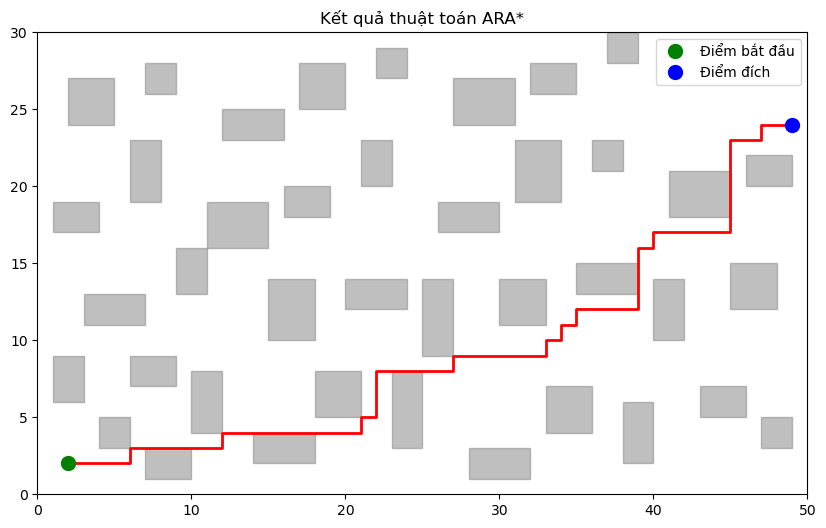

In [12]:
import heapq
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Thiết lập các thông số môi trường
WIDTH = 50
HEIGHT = 30
START = (2, 2)
GOAL = (49, 24)

def heuristic(start, goal):
    return math.sqrt((start[0] - goal[0])**2 + (start[1] - goal[1])**2)

def get_successors(state, grid):
    successors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for d in directions:
        next_state = (state[0] + d[0], state[1] + d[1])
        if 0 <= next_state[0] < WIDTH and 0 <= next_state[1] < HEIGHT and grid[next_state[1]][next_state[0]] == 0:
            successors.append(next_state)
    return successors

def ARA_star(grid, start, goal, epsilon):
    g = {start: 0}
    f = {start: epsilon * heuristic(start, goal)}
    open_list = []
    heapq.heappush(open_list, (f[start], start))
    closed_list = set()
    incons = set()
    
    def return_g(state):
        return g.get(state, float('inf')) + epsilon * heuristic(state, goal)

    def improve_path():
        while open_list and f.get(goal, float('inf')) > open_list[0][0]:
            _, current = heapq.heappop(open_list)
            if current == goal:
                break
            closed_list.add(current)
            for succ in get_successors(current, grid):
                if succ not in g:
                    g[succ] = float('inf')
                if g[succ] > g[current] + 1:
                    g[succ] = g[current] + 1
                    f[succ] = g[succ] + epsilon * heuristic(succ, goal)
                    if succ not in closed_list:
                        heapq.heappush(open_list, (f[succ], succ))
                    else:
                        incons.add(succ)

    g[goal] = float('inf')
    improve_path()
    
    path = reconstruct_path(g, start, goal)
    epsilon_prime = min(epsilon, g[goal] / min([return_g(s) for _, s in open_list + list(incons)] + [float('inf')]))
    
    while epsilon_prime > 1.001:  # Thêm ngưỡng dừng
        epsilon = max(1, epsilon - 0.5)  # Giảm epsilon nhanh hơn
        while incons:
            s = incons.pop()
            heapq.heappush(open_list, (f[s], s))
        for i in range(len(open_list)):
            state = open_list[i][1]
            f[state] = g[state] + epsilon * heuristic(state, goal)
            open_list[i] = (f[state], state)
        heapq.heapify(open_list)
        closed_list.clear()
        improve_path()
        path = reconstruct_path(g, start, goal)
        epsilon_prime = min(epsilon, g[goal] / min([return_g(s) for _, s in open_list + list(incons)] + [float('inf')]))

    return path

def reconstruct_path(g, start, goal):
    if g[goal] == float('inf'):
        return []
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = min(get_successors(current, grid), key=lambda s: g.get(s, float('inf')))
    path.append(start)
    path.reverse()
    return path

def create_obstacles():
    return [
        ((4, 3), 2, 2), ((7, 1), 3, 2), ((1, 6), 2, 3), ((6, 7), 3, 2),
        ((10, 4), 2, 4), ((14, 2), 4, 2), ((18, 5), 3, 3), ((23, 3), 2, 5),
        ((28, 1), 4, 2), ((33, 4), 3, 3), ((38, 2), 2, 4), ((43, 5), 3, 2),
        ((47, 3), 2, 2), ((3, 11), 4, 2), ((9, 13), 2, 3), ((15, 10), 3, 4),
        ((20, 12), 4, 2), ((25, 9), 2, 5), ((30, 11), 3, 3), ((35, 13), 4, 2),
        ((40, 10), 2, 4), ((45, 12), 3, 3), ((1, 17), 3, 2), ((6, 19), 2, 4),
        ((11, 16), 4, 3), ((16, 18), 3, 2), ((21, 20), 2, 3), ((26, 17), 4, 2),
        ((31, 19), 3, 4), ((36, 21), 2, 2), ((41, 18), 4, 3), ((46, 20), 3, 2),
        ((2, 24), 3, 3), ((7, 26), 2, 2), ((12, 23), 4, 2), ((17, 25), 3, 3),
        ((22, 27), 2, 2), ((27, 24), 4, 3), ((32, 26), 3, 2), ((37, 28), 2, 2)
    ]

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, WIDTH)
    ax.set_ylim(0, HEIGHT)
    ax.set_aspect('equal')

    for obstacle in obstacles:
        rect = plt.Rectangle(obstacle[0], obstacle[1], obstacle[2], fill=True, color='gray', alpha=0.5)
        ax.add_patch(rect)

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán ARA*')

    plt.savefig('pic4-5.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def run_single_iteration(grid, start, goal, epsilon):
    start_time = time.time()
    path = ARA_star(grid, start, goal, epsilon)
    end_time = time.time()
    execution_time = end_time - start_time
    return path, execution_time

def main():
    grid = np.zeros((HEIGHT, WIDTH), dtype=int)
    obstacles = create_obstacles()
    for (x, y), w, h in obstacles:
        grid[y:y+h, x:x+w] = 1
    total_start = time.time()
    start = START
    goal = GOAL
    epsilon = 5.0

    iterations = 1000
    execution_times = []
    path_lengths = []

    for _ in range(iterations):
        path, execution_time = run_single_iteration(grid, start, goal, epsilon)
        execution_times.append(execution_time)
        path_lengths.append(len(path))
    total_end = time.time()
    
    # Tính toán và in kết quả
    avg_time = statistics.mean(execution_times)
    total_time = total_end - total_start
    std_dev_time = statistics.stdev(execution_times)
    min_time = min(execution_times)
    max_time = max(execution_times)
    avg_path_length = statistics.mean(path_lengths)

    print(f"Số lần chạy: {iterations}")
    print(f"Tổng thời gian: {total_time} giây")
    print(f"Thời gian trung bình: {avg_time:.6f} giây")
    print(f"Độ lệch chuẩn thời gian: {std_dev_time:.6f} giây")
    print(f"Thời gian ngắn nhất: {min_time:.6f} giây")
    print(f"Thời gian dài nhất: {max_time:.6f} giây")
    print(f"Độ dài đường đi trung bình: {avg_path_length:.2f}")

    # Vẽ kết quả cho lần chạy cuối cùng
    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()